In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)
worksheet=gc.open("ex1DL").sheet1
df=worksheet.get_all_values()
df

[['input', 'output'],
 ['1', '6'],
 ['2', '10'],
 ['3', '14'],
 ['4', '18'],
 ['5', '22'],
 ['6', '26'],
 ['7', '30'],
 ['8', '34'],
 ['9', '38'],
 ['10', '42'],
 ['11', '46'],
 ['12', '50'],
 ['13', '54'],
 ['14', '58'],
 ['15', '62'],
 ['16', '66'],
 ['17', '70'],
 ['18', '74'],
 ['19', '78'],
 ['20', '82']]

In [ ]:
import pandas as pd
a=pd.DataFrame(df)
a.describe()

,0,1
count,21,21
unique,21,21
top,input,output
freq,1,1


In [ ]:
Sds1=pd.DataFrame(df[1:],columns=df[0])
ds1=ds1.astype({'input':'float'})
ds1=ds1.astype({'output':'float'})
ds1.head()

,input,output
0,1.0,6.0
1,2.0,10.0
2,3.0,14.0
3,4.0,18.0
4,5.0,22.0


In [ ]:
x = ds1[['input']].values
y = ds1[['output']].values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=33)
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
xtrain=scaler.transform(x_train)
model=Sequential([Dense(8,activation="relu",input_shape=[1]),Dense(10,activation="relu"),Dense(1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer='rmsprop',loss='mse')
model.fit(xtrain,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step - loss: 2206.5093
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2204.6233
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2203.2463
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2202.1362
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2201.1614
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2200.2556
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2199.4028
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2198.5850
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2197.7932
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2197.0225
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2196.2651
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2195.5259
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2194.7974
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2194.0774
Epoch 15/2000
1/1 ━━━━━━━━━━

<Axes: >

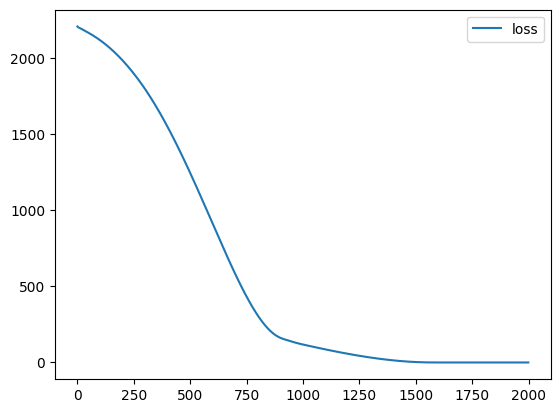

In [ ]:
cf=pd.DataFrame(model.history.history)
cf.plot()

In [ ]:
xtrain=scaler.transform(x_test)
model.evaluate(xtrain,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - loss: 0.0048


0.004804736934602261

In [ ]:
n=[[17]]
n=scaler.transform(n)
model.predict(n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[69.914894]], dtype=float32)